#### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from ydata_profiling import ProfileReport
import re

In [2]:
# Load the dataset
file_path = 'census06.csv'
census = pd.read_csv(file_path)

# Display first few rows
census.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",NaN,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",NaN,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,NaN,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,NaN,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",NaN,NaN


#### Initial data profiling

In [3]:
# Generata initail report
initial_profile = ProfileReport(census, title='Census Data Profiling Report', explorative= True)

# Save the profile report to HTML file
initial_profile.to_file('initial_census_data_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Handle the Colums datatype

In [4]:
# Check the cesus informations
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   object
 5   Relationship to Head of House  7780 non-null   object
 6   Marital Status                 6273 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      68 non-null     object
 10  Religion                       3424 non-null   object
dtypes: int64(1), object(10)
memory usage: 715.9+ KB


In [5]:
# List Categorical column
categorical_column = ['Relationship to Head of House','Marital Status','Gender','Infirmity','Religion']


In [6]:
# Convert 'Category' column to categorical
for column in categorical_column:
    census[column] = census[column].astype('category')
    

Clean the Age column
- Drop the two rows in the Age with empty strings because they would not significantly impact the outcome of the entire data set.


In [7]:
# Drop row with empty Age value
census = census[census['Age'] != ' ']

In [8]:
# Convert 'Age' column to float and then to int
census['Age'] = census['Age'].astype('float').astype('int')

In [9]:
census['First Name'] = census['First Name'].astype('str')

In [10]:
# Print data info
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8327 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   8327 non-null   int64   
 1   Street                         8327 non-null   object  
 2   First Name                     8327 non-null   object  
 3   Surname                        8327 non-null   object  
 4   Age                            8327 non-null   int32   
 5   Relationship to Head of House  7778 non-null   category
 6   Marital Status                 6271 non-null   category
 7   Gender                         8327 non-null   category
 8   Occupation                     8327 non-null   object  
 9   Infirmity                      68 non-null     category
 10  Religion                       3423 non-null   category
dtypes: category(5), int32(1), int64(1), object(4)
memory usage: 465.3+ KB


#### Handle Missing Values

In [11]:
# Identify missing values
missing_values = census.isnull().sum()

# Output missing values
missing_values 

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     549
Marital Status                   2056
Gender                              0
Occupation                          0
Infirmity                        8259
Religion                         4904
dtype: int64

#### "Relationship to Head of House" missing data

In [12]:
# Check for unique values
list(census['Relationship to Head of House'].unique())

['Head',
 'Partner',
 'Husband',
 'Son',
 nan,
 'Daughter',
 'Wife',
 'Grandson',
 'Lodger',
 'Visitor',
 'Cousin',
 'Step-Son',
 'Sibling',
 'Granddaughter',
 'Step-Daughter',
 'Adopted Son',
 'Nephew',
 'Adopted Daughter',
 'Son-in-law',
 'Neice',
 'Daughter-in-law',
 'Adopted Grandson',
 'Adopted Granddaughter']

In [13]:
# Define a function to update Relationship to Head of House Status
def update_relationship_to_head_status(row):
     if pd.isna(row['Relationship to Head of House']):
        return 'Unknown'
     else:
        return row['Relationship to Head of House']

In [14]:
# Set the Relationship to Head of House with nan values to 'Unknown'


# Use apply to update Relationship to Head of House Status column
census['Relationship to Head of House'] = census.apply(update_relationship_to_head_status, axis=1)

In [15]:
# Check for unique values
census['Relationship to Head of House'].unique()

array(['Head', 'Partner', 'Husband', 'Son', 'Unknown', 'Daughter', 'Wife',
       'Grandson', 'Lodger', 'Visitor', 'Cousin', 'Step-Son', 'Sibling',
       'Granddaughter', 'Step-Daughter', 'Adopted Son', 'Nephew',
       'Adopted Daughter', 'Son-in-law', 'Neice', 'Daughter-in-law',
       'Adopted Grandson', 'Adopted Granddaughter'], dtype=object)

In [16]:
# Check for missing values
census['Relationship to Head of House'].isnull().sum()

0

#### "Marital Status" missing data

In [17]:
# Check for unique values
census['Marital Status'].unique()

['Single', 'Married', 'Divorced', NaN, 'Widowed', ' ']
Categories (5, object): [' ', 'Divorced', 'Married', 'Single', 'Widowed']

Observation
- There are both missing null values and empty strings in the marital status
- also note that an empty values is not the same as a null value

The United Nations Convention on the Rights of the Child (UNCRC) defines a child as everyone under 18 unless, "under the law applicable to the child, majority is attained earlier".

NSPCC 2023, 'Children and the law', NSPCC Learning, 20 December 2023, https://learning.nspcc.org.uk/child-protection-system/children-the-law

In [18]:
# Define a function to update Marital Status
def update_marital_status(row):
    if row['Age'] < 18:
        return 'Child'
    if row['Marital Status'] == ' ':
        return 'Unknown'
    else:
        return row['Marital Status']

In [19]:
# Set the Marital Status of children below the age of 18 to Child
# Set Marital Status with empty string to unknown

# Use apply to update Marital Status column
census['Marital Status'] = census.apply(update_marital_status, axis=1)

In [20]:
# Check for unique values
census['Marital Status'].unique()

array(['Single', 'Married', 'Divorced', 'Child', 'Widowed', 'Unknown'],
      dtype=object)

In [21]:
# Check for missing values
census['Marital Status'].isnull().sum()

0

#### "Infirmity" missing data

In [22]:
# Check for unique values
census['Infirmity'].unique()

[NaN, 'Physical Disability', 'Mental Disability', 'Unknown Infection', ' ', 'Disabled', 'Blind', 'Deaf']
Categories (7, object): [' ', 'Blind', 'Deaf', 'Disabled', 'Mental Disability', 'Physical Disability', 'Unknown Infection']

Observation

There are null, empty and Unkown Infection as part of the infimity

Infirmity refers to a state of physical or mental weakness, often associated with old age or a lack of vitality. 

'Unknown infection' is not an infirmity and can be replaced with 'Unknown'
The null and empty values can also be replaced with 'Unknown'

Ronish, R. 2023, 'Difference Between Infirmity and Sickness', Medium, 4 October 2023, https://medium.com/@ronishrh5/difference-between-infirmity-and-sickness-9471b93c6d4d

In [23]:
# Define a function to update Infirmity Status
def update_infirmity_status(row):
     if pd.isna(row['Infirmity']) or (row['Infirmity'] == 'Unknown Infection') or (row['Infirmity'] == ' '):
        return 'Unknown'
     else:
        return row['Infirmity']

In [24]:
# Set the Infirmity Status of children below the age of 18 to Child
# Set Infirmity Status with empty string to unknown

# Use apply to update Marital Status column
census['Infirmity']  = census.apply(update_infirmity_status, axis=1)

In [25]:
# Check for unique values
census['Infirmity'].unique()

array(['Unknown', 'Physical Disability', 'Mental Disability', 'Disabled',
       'Blind', 'Deaf'], dtype=object)

In [26]:
# Check for missing values
census['Infirmity'].isnull().sum()

0

#### "Religion" missing data

In [27]:
# Check for unique values
census['Religion'].unique()

['Catholic', 'Methodist', NaN, 'Christian', 'Sikh', 'Muslim', 'Jewish', 'Buddist', ' ', 'Quaker']
Categories (9, object): [' ', 'Buddist', 'Catholic', 'Christian', ..., 'Methodist', 'Muslim', 'Quaker', 'Sikh']

Observation
- There are both missing null values and empty strings in the religion status
- Buddist (Typo, should be corrected to Buddhist)

In [28]:
census[census['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3054,23,Riley Avenue,Katherine,Scott,25,Head,Single,Female,Unemployed,Unknown,
6456,1,Gibbs Lane,Donna,Mitchell,85,Head,Divorced,Female,Retired Fast food restaurant manager,Unknown,
6824,53,July Isle,Leon,Marshall,23,Unknown,Single,Male,"Programmer, multimedia",Unknown,
7573,12,Blackhook Lane,Mohamed,Stephens,51,Husband,Married,Male,"Programmer, multimedia",Unknown,


In [29]:
# Check for null values
census[census['Religion'].isna()].head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",Unknown,NaN
5,3,Scott Dale,Norman,Patel,42,Husband,Married,Male,Higher education lecturer,Unknown,NaN
6,4,Scott Dale,Sophie,Akhtar,38,Head,Divorced,Female,Hydrographic surveyor,Physical Disability,NaN
7,4,Scott Dale,Jamie,Akhtar,7,Son,Child,Male,Student,Unknown,NaN
8,5,Scott Dale,Duncan,Law,29,Head,Single,Male,Trading standards officer,Unknown,NaN


In [30]:
# Define a function to update Religion Status
def update_religion_status(row):
    if pd.isna(row['Religion']) or (row['Religion'] == ' '):
        return 'Unknown'
    # Buddist (Typo, should be corrected to Buddhist)
    if row['Religion'] == 'Buddist':
        return 'Buddhist'
    else:
        return row['Religion']

In [31]:
# Set the Religion Status of null to unknown
# Set Religion Status with empty string to unknown

# Use apply to update Religion Status column
census['Religion']  = census.apply(update_religion_status, axis=1)

In [32]:
# Check for unique values
census['Religion'].unique()

array(['Catholic', 'Methodist', 'Unknown', 'Christian', 'Sikh', 'Muslim',
       'Jewish', 'Buddhist', 'Quaker'], dtype=object)

In [33]:
# Check for missing values
census['Religion'].isnull().sum()

0

In [34]:
# Print data info
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8327 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   8327 non-null   int64   
 1   Street                         8327 non-null   object  
 2   First Name                     8327 non-null   object  
 3   Surname                        8327 non-null   object  
 4   Age                            8327 non-null   int32   
 5   Relationship to Head of House  8327 non-null   object  
 6   Marital Status                 8327 non-null   object  
 7   Gender                         8327 non-null   category
 8   Occupation                     8327 non-null   object  
 9   Infirmity                      8327 non-null   object  
 10  Religion                       8327 non-null   object  
dtypes: category(1), int32(1), int64(1), object(8)
memory usage: 691.3+ KB


#### Cleaned data profiling

In [35]:
# Generata initail report
initial_profile = ProfileReport(census, title='Cleaned Census Data Profiling Report', explorative= True)

# Save the profile report to HTML file
initial_profile.to_file('cleaned_census_data_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Examine the age distribution (age pyramid) of the population.

In [36]:
# Define the bins and labels
bins = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 200]

labels = [f"{i}-{i + 4}" if i < 95 else '95+' for i in range(0, 100, 5)]
print(f'length of labels = {len(labels)} and length of bins = {len(bins)}')

length of labels = 20 and length of bins = 21


In [37]:
# Apply pd.cut to group the age
census['Age Group'] = pd.cut(census['Age'], bins=bins, labels=labels, right=False)

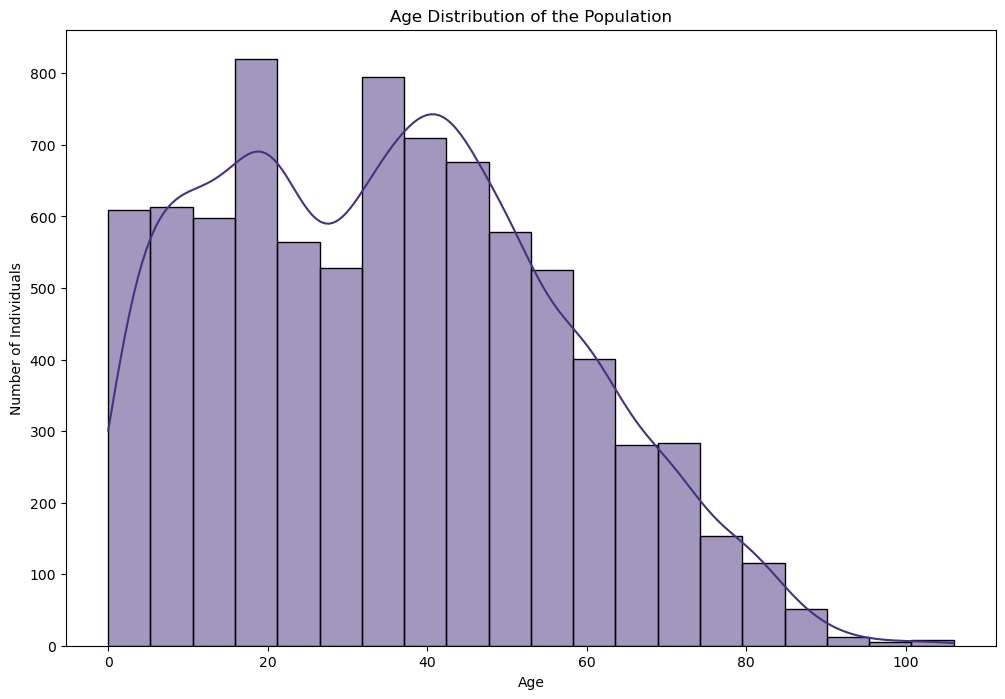

In [45]:
# Create a histogram for Age distribution
plt.figure(figsize=(12, 8))
sns.histplot(data=census, x='Age', bins=20, kde=True, edgecolor='black')
plt.title('Age Distribution of the Population')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')

# Save the Seaborn plot
plt.savefig("age_distribution.png")

# Show the plot
plt.show()


- In the context of age distribution, a right-skewed distribution might suggest an older   population with a few extremely elderly individuals.


In [39]:
# show data description
census.describe()

,House Number,Age
count,8327.000000,8327.000000
mean,29.340098,35.292542
std,35.748361,21.376500
min,1.000000,0.000000
25%,8.000000,18.000000
50%,19.000000,35.000000
75%,35.000000,50.000000
max,207.000000,106.000000


The mean (35.29) is greater than the median (35), suggesting a rightward or positive skewness. This indicates that there might be a tail of older individuals, pulling the mean to the right

In [40]:
# Get the skewness of the age
skewness_age = census['Age'].skew()
print("Skewness of Age:", skewness_age)

Skewness of Age: 0.3151504961169674


 skewness value is positive, it supports the interpretation of a right-skewed distribution

Overall Age Distribution:

- The age distribution appears to be right-skewed, as indicated by the higher mean age (35.29) compared to the median age (35).The presence of a few individuals with ages as high as 106 contributes to this right-skewed appearance.

Age Groups:

- The age distribution is diverse, with individuals spanning from 0 to 106 years. The 25th percentile (Q1) is 18, indicating that 25% of the individuals are aged 18 or younger. The median age (Q2) is 35, suggesting that 50% of the individuals are aged 35 or younger. The 75th percentile (Q3) is 50, implying that 75% of the individuals are aged 50 or younger.

Retired Aged People:

- To specifically analyze the distribution of retired aged people, you would need information about their occupations or a specific category indicating retirement.You could create a subset of the data for individuals with occupations related to retirement and analyze their age distribution separately.

Future Predictions:

- Predicting the future age distribution requires additional data, such as birth rates, mortality rates, and demographic trends.The current analysis provides insights into the current state of the population but doesn't directly predict future changes.

Answer to the Question:

- The age distribution in the current dataset appears to have a right-skewed shape, with a concentration of individuals in younger age groups and a tail extending towards older ages.

- It's challenging to make specific predictions about future age distribution without additional demographic data.

- Further analysis, particularly regarding occupations and retirement status, would provide more insights into the distribution of retired aged people.

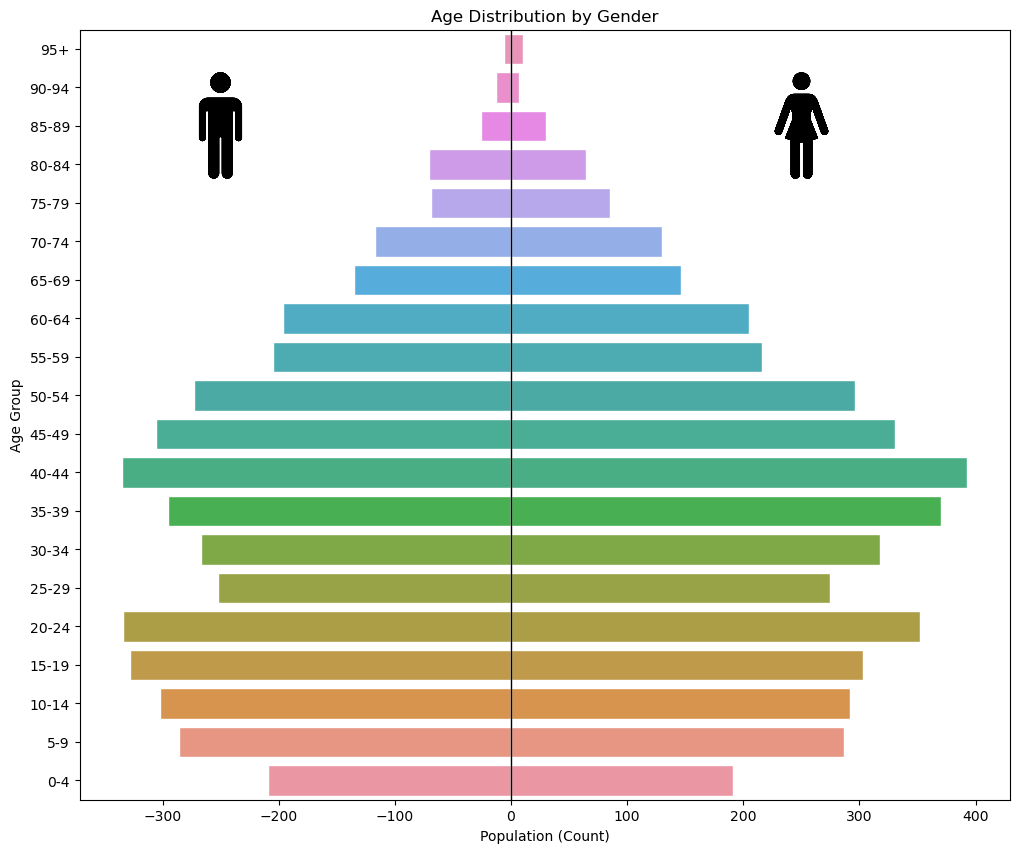

In [41]:
# Count the number of individuals in each age group
age_group_counts = census.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)

# Set the color palette to 'viridis'
sns.set_palette('viridis')

# Plot the stacked bar chart with age groups on the y-axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot male population (negative values)
sns.barplot(x=-age_group_counts['Male'], y=age_group_counts.index,  edgecolor='w', label='Male')

# Plot female population (positive values)
sns.barplot(x=age_group_counts['Female'], y=age_group_counts.index,   edgecolor='w', label='Female')

# Add a vertical line in the middle
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

# Invert the y-axis
plt.gca().invert_yaxis()

# Add icons for male and female
male_icon = plt.imread('man.png')  # Replace with the actual path to your male icon image
female_icon = plt.imread('girl.png')  # Replace with the actual path to your female icon image

# Define the coordinates for icons
male_coords = (-250, 17)
female_coords = (250, 17)

# Add AnnotationBbox for male icon
male_imagebox = OffsetImage(male_icon, zoom=0.15)
male_ab = AnnotationBbox(male_imagebox, male_coords, frameon=False, boxcoords="data", pad=0)
ax.add_artist(male_ab)

# Add AnnotationBbox for female icon
female_imagebox = OffsetImage(female_icon, zoom=0.15)
female_ab = AnnotationBbox(female_imagebox, female_coords, frameon=False, boxcoords="data", pad=0)
ax.add_artist(female_ab)


plt.title('Age Distribution by Gender')
plt.xlabel('Population (Count)')
plt.ylabel('Age Group')

# Save the Seaborn plot
plt.savefig("age_pyramid.png")

plt.show()


#### Analyzing Populations Occupation Status

In [48]:
census.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",Unknown,Catholic,50-54
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",Unknown,Catholic,50-54
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,Unknown,Methodist,70-74
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,Unknown,Methodist,70-74
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",Unknown,Unknown,35-39


Analysing the popuplation occupational status will start with separating each individual into their repective occupations and employment status

In [64]:
# Create an Employment Status column

for index, row in census.iterrows():
    unemployed_pattern = re.compile(r'^Unemployed$', flags=re.IGNORECASE)
    child_pattern = re.compile(r'^Child$', flags=re.IGNORECASE)
    university_student_pattern = re.compile(r'^University Student$', flags=re.IGNORECASE)
    student_pattern = re.compile(r'^Student$', flags=re.IGNORECASE)
#     retired_age_pattern = re.compile(r'Retired', flags=re.IGNORECASE)
    
    if row['Age'] >= 66:
        census.at[index, 'Employment Status'] = 'Retired'
    elif unemployed_pattern.search(row['Occupation']) is not None and row['Age'] < 66:
        census.at[index, 'Employment Status'] = 'Unemployed'
    elif child_pattern.search(row['Occupation']):
        census.at[index, 'Employment Status'] = 'Child'
    elif student_pattern.search(row['Occupation']):
        census.at[index, 'Employment Status'] = 'Student (Child)'
    elif university_student_pattern.search(row['Occupation']):
        census.at[index, 'Employment Status'] = 'University Student'
    else:
        census.at[index, 'Employment Status'] = 'Employed'

In [65]:
# Display unique values
census['Employment Status'].unique()

array(['Employed', 'Retired', 'Student (Child)', 'University Student',
       'Child', 'Unemployed'], dtype=object)

In [66]:
# Display Student (Child) data
census[census['Employment Status'] == 'Student (Child)']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Employment Status
7,4,Scott Dale,Jamie,Akhtar,7,Son,Child,Male,Student,Unknown,Unknown,5-9,Student (Child)
15,7,Scott Dale,Alex,O'Neill-Walker-Iqbal,17,Son,Child,Male,Student,Unknown,Unknown,15-19,Student (Child)
22,9,Scott Dale,Rhys,Smith,7,Son,Child,Male,Student,Unknown,Unknown,5-9,Student (Child)
30,12,Scott Dale,Joe,Taylor,5,Son,Child,Male,Student,Unknown,Unknown,5-9,Student (Child)
37,15,Scott Dale,Samuel,Moore,14,Grandson,Child,Male,Student,Unknown,Unknown,15-19,Student (Child)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8296,1,Faith Bastion,Terence,Lawson,5,Son,Child,Male,Student,Unknown,Unknown,5-9,Student (Child)
8307,1,Jones Barracks,Michelle,Stevenson,16,Daughter,Child,Female,Student,Unknown,Unknown,15-19,Student (Child)
8308,1,Jones Barracks,Guy,Stevenson,12,Son,Child,Male,Student,Unknown,Unknown,10-14,Student (Child)
8309,1,Jones Barracks,Vanessa,Stevenson,10,Daughter,Child,Female,Student,Unknown,Unknown,10-14,Student (Child)


In [72]:
# Get the employment status
employment_status = census['Employment Status']

employment_status_count = employment_status.value_counts()

# Calculate employment percentage frequency
employment_status_frequency = round((employment_status_count / len(employment_status)) * 100, 1).astype('str')

# Create dataframe to display the result
employment_status_df = pd.DataFrame({
    'Value': employment_status_count.index,
    'Count': employment_status_count.values,
    'Frequency (%)': employment_status_frequency.values + "%"
})

# Display result
employment_status_df

,Value,Count,Frequency (%)
0,Employed,4341,52.1%
1,Student (Child),1669,20.0%
2,Retired,783,9.4%
3,University Student,558,6.7%
4,Child,500,6.0%
5,Unemployed,476,5.7%


In [80]:
# Generate report
employment_census_data = ProfileReport(employment_status_df, title='Employment Census Data Report', explorative= True)

# Save the profile report to HTML file
employment_census_data.to_file('employment_census_data_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

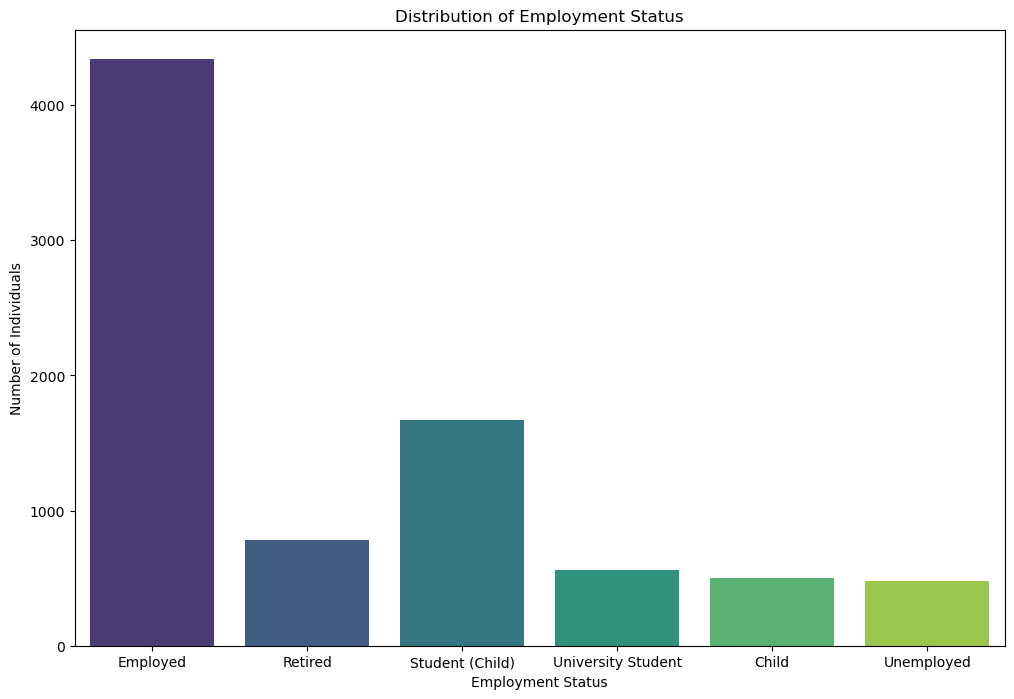

In [84]:
# Visualize Unemployment Trends
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(data=census, x='Employment Status', palette='viridis')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Individuals')

# Save the Seaborn plot
plt.savefig("employment_status_dist.png")

plt.show()


In [88]:
# Unemployed Population by Age Group


unemployment_df = census[census['Employment Status'] == 'Unemployed']
unemployment_df['Age Group'] = unemployment_df['Age Group'].astype('str')
unemployment_age = unemployment_df.groupby(['Age Group'])['Employment Status'].count()
unemployment_age  = unemployment_age.reset_index(name='Count')
unemployment_age 

,Age Group,Count
0,20-24,10
1,25-29,49
2,30-34,60
3,35-39,70
4,40-44,96
5,45-49,54
6,50-54,60
7,55-59,33
8,60-64,34
9,65-69,10


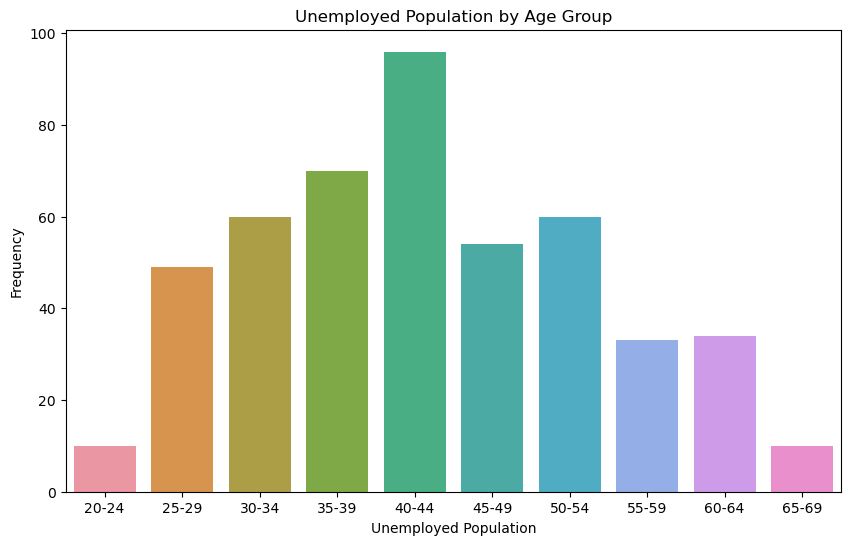

In [87]:
# Unemployed Population by Age Group Graph
plt.figure(figsize=(10, 6))

sns.barplot(x='Age Group', y='Count', data=unemployment_age)

plt.title('Unemployed Population by Age Group')
plt.xlabel('Unemployed Population')
plt.ylabel('Frequency')
plt.savefig('unemployed_population_by_age_group.png')
plt.show()


The age group with the highest unemployment rate is ages between 40-44 therefore between the ages of 40-44 people are more likely to be unemployed expecially the female gender.

In [90]:
# Create a dataframe for unemployed status
unemployed_population = census[census['Employment Status'] == 'Unemployed']

# Average age of unemployed population
unemployement_average_age = round(unemployed_population['Age'].mean())
print(f'The average unemployment age is {unemployement_average_age}')

The average unemployment age is 42


In [92]:
# Unemployment by gender
unemployment_by_gender = unemployed_population.groupby('Gender').count()['Employment Status']
unemployment_by_gender = unemployment_by_gender.reset_index()
unemployment_by_gender

,Gender,Employment Status
0,Female,295
1,Male,181


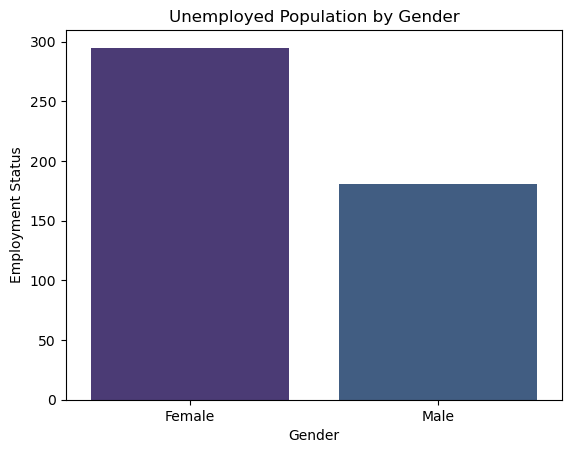

In [97]:
# Unemployment by gender graph
sns.barplot(x="Gender", y="Employment Status", data=unemployment_by_gender)
plt.title('Unemployed Population by Gender')
# Save the Seaborn plot
plt.savefig("unemployment_by_gender.png")
plt.show()

Their is significantly more unemployed females than males. Maybe the government should also consider programs tailored to make women more employable


#### Explore the Proportion of Retired Aged People

Proportion of Retired Aged People: 0.09403146391257355


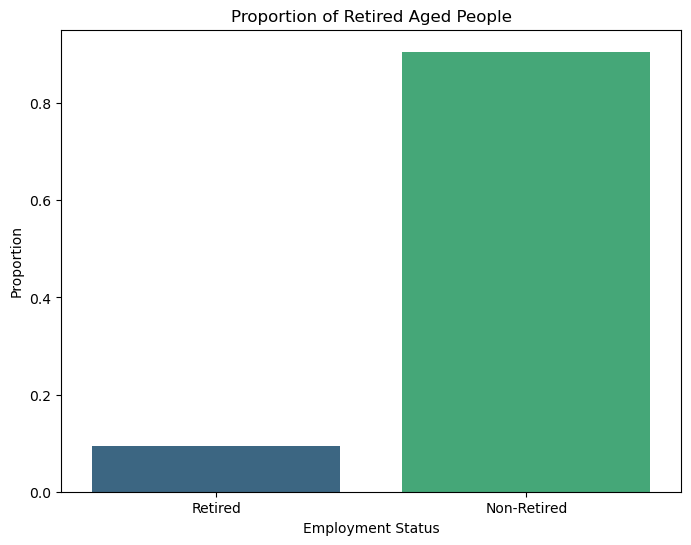

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the proportion of retired aged people
retired_count = census[census['Employment Status'] == 'Retired'].shape[0]
total_count = census.shape[0]
proportion_retired = retired_count / total_count

# Display the proportion
print("Proportion of Retired Aged People:", proportion_retired)

# Visualize the proportion with a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Retired', 'Non-Retired'], y=[proportion_retired, 1 - proportion_retired], palette='viridis')
plt.title('Proportion of Retired Aged People')
plt.xlabel('Employment Status')
plt.ylabel('Proportion')

plt.savefig("retired_age.png")

plt.show()


This means that around 9.4% of the individuals in the census data are "Retired.

Examine religious affiliations. Are any religions growing, or shrinking? Are there any newer 
religions that are increasing in numbers?


In [117]:
religious_status = census['Religion']

religious_status_count = religious_status.value_counts()

# Calculate employment percentage frequency
religious_status_frequency = round((religious_status_count / len(religious_status)) * 100, 1).astype('str')

# Create dataframe to display the result
religious_status_df = pd.DataFrame({
    'Value': religious_status_count.index,
    'Count': religious_status_count.values,
    'Frequency (%)': religious_status_frequency.values + "%"
})

# Display result
religious_status_df

,Value,Count,Frequency (%)
0,Unknown,4908,58.9%
1,Christian,1780,21.4%
2,Catholic,881,10.6%
3,Methodist,547,6.6%
4,Muslim,115,1.4%
5,Sikh,55,0.7%
6,Jewish,38,0.5%
7,Quaker,2,0.0%
8,Buddhist,1,0.0%


In [119]:
# Generate report
religious_census_data = ProfileReport(religious_status_df, title='Religion Census Data Report', explorative= True)

# Save the profile report to HTML file
religious_census_data.to_file('religious_census_data_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

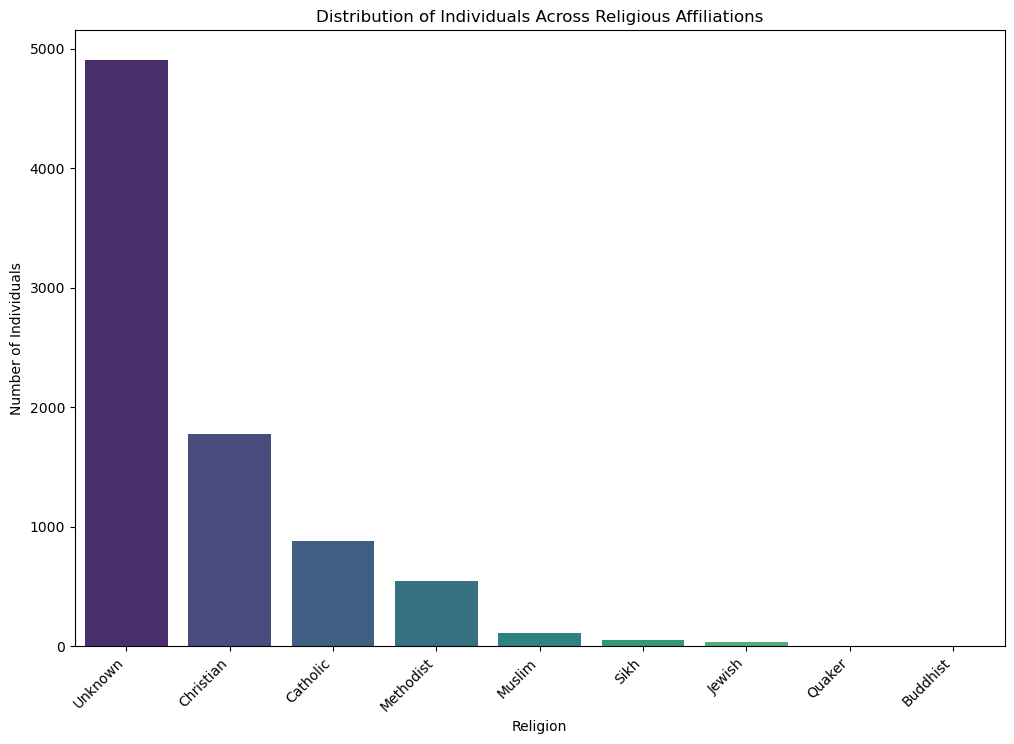

In [115]:
# Visualize the distribution of individuals across religious affiliations
plt.figure(figsize=(12, 8))
sns.countplot(data=census, x='Religion', order=census['Religion'].value_counts().index, palette='viridis')
plt.title('Distribution of Individuals Across Religious Affiliations')
plt.xlabel('Religion')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

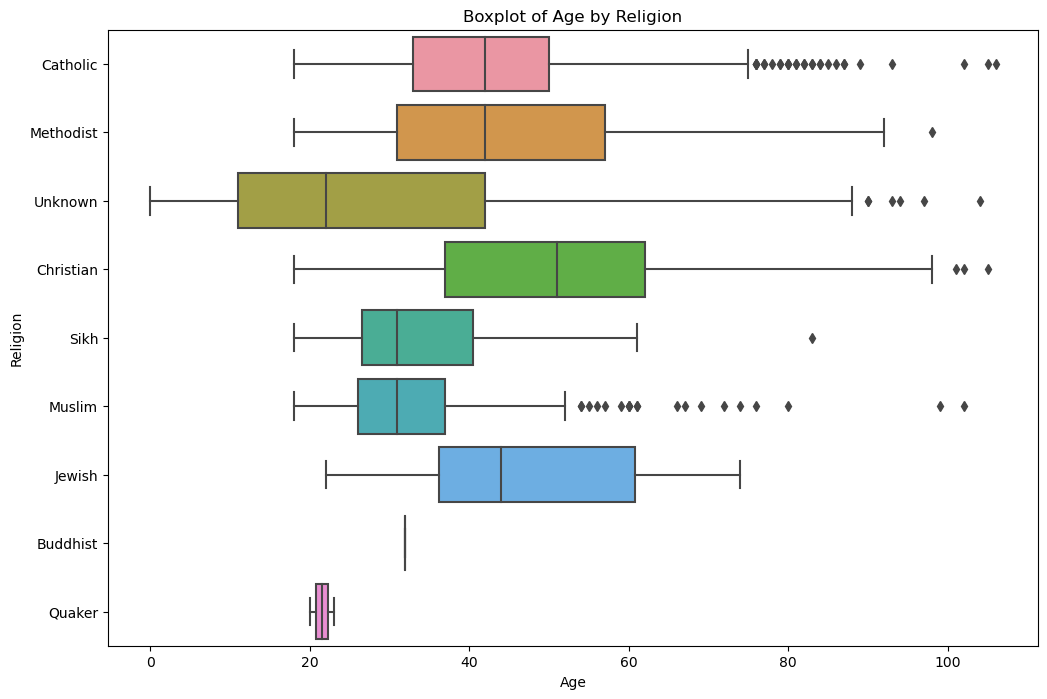

In [120]:
# Boxplot of Age by religion
plt.figure(figsize=(12, 8))

sns.boxplot(y='Religion', x='Age', data=census)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Religion')
plt.title('Boxplot of Age by Religion')

plt.savefig("religion_boxplot.png")

# Display the plot
plt.show()

The religion quaker is alsmost none existant. The most dominant religion being Christian have a average age of the church to be 48 which are middle aged adults, most children do not have any religion.

No religion is clearly increasing in number. Quaker seem to be the newer religion since the average age of followers are 21 years of age but its not clear if it would expirence an significant growth

if 58% of people with none as their religion status are mostly children. It also means that the children are most likely often accompany their parents to their place of worship. Hence have that the largest religion in this dataset is Christian there maybe need to build a second church to manage the population.


 #### Examine the divorce and marriage rate

In [126]:
# Get value counts for marital status
marital_status = census['Marital Status']

marital_status_count = marital_status.value_counts()

# Calculate employment percentage frequency
marital_status_frequency = round((marital_status_count / len(marital_status)) * 100, 1).astype('str')

# Create dataframe to display the result
marital_status_df = pd.DataFrame({
    'Value': marital_status_count.index,
    'Count': marital_status_count.values,
    'Frequency (%)': marital_status_frequency.values + "%"
})

# Display result
marital_status_df

,Value,Count,Frequency (%)
0,Single,2940,35.3%
1,Married,2222,26.7%
2,Child,2058,24.7%
3,Divorced,744,8.9%
4,Widowed,360,4.3%
5,Unknown,3,0.0%


In [127]:
# Generate report
marital_census_data = ProfileReport(marital_status_df, title='Marital Census Data Report', explorative= True)

# Save the profile report to HTML file
marital_census_data.to_file('marital_census_data_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

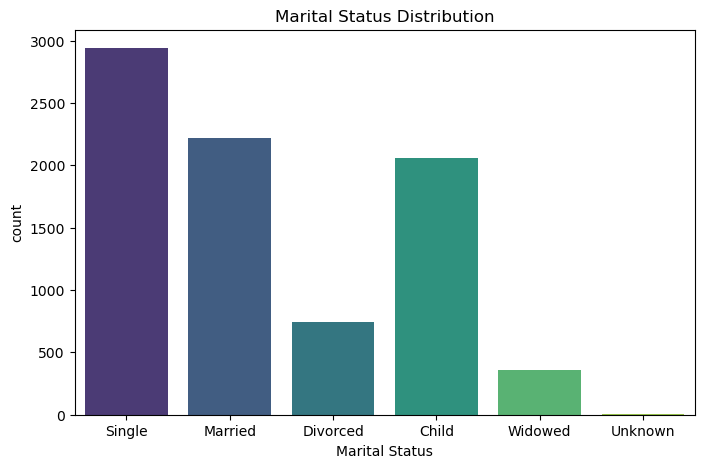

In [130]:
plt.figure(figsize=(8,5))
sns.countplot(x='Marital Status', data=census)
plt.title("Marital Status Distribution")

plt.savefig("marital_df.png")

plt.show()

In [249]:
# Calculate the number of individuals in each marital status
marriage_count = census[census['Marital Status'] == 'Married'].shape[0]
divorce_count = census[census['Marital Status'] == 'Divorced'].shape[0]

# Calculate the total number of individuals
total_count = census.shape[0]

# Calculate marriage and divorce rates
marriage_rate = marriage_count / total_count
divorce_rate = divorce_count / total_count

# Display the rates
print("Marriage Rate:", marriage_rate)
print("Divorce Rate:", divorce_rate)

Marriage Rate: 0.2668428005284016
Divorce Rate: 0.08934790440734959


27% of the population is married and 9% are divorced

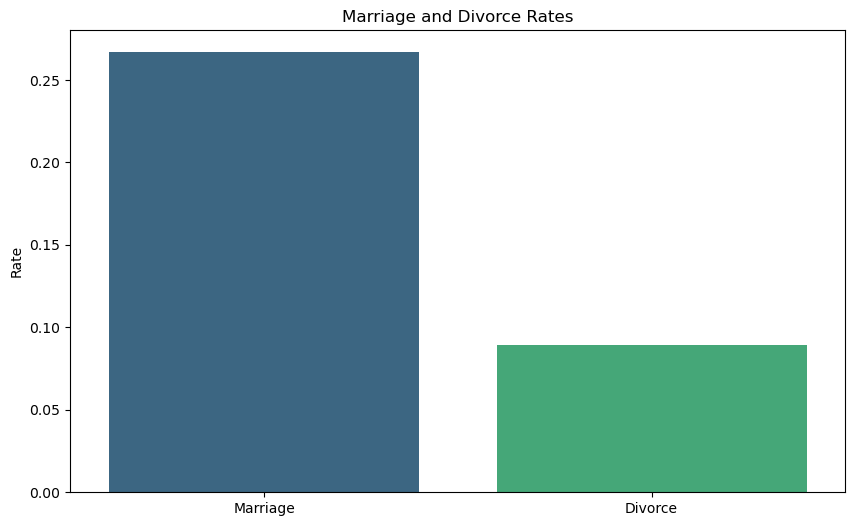

In [250]:
# Visualize the marriage and divorce rates
plt.figure(figsize=(10, 6))
sns.barplot(x=['Marriage', 'Divorce'], y=[marriage_rate, divorce_rate], palette='viridis')
plt.title('Marriage and Divorce Rates')

plt.savefig("marriage_divorce_rate.png")

plt.ylabel('Rate')
plt.show()

In [131]:
# Marriage distribution against age
married_df = census[census['Marital Status'] == 'Married'].groupby('Age Group').size().reset_index(name='Marriage Count')

married_df

,Age Group,Marriage Count
0,0-4,0
1,5-9,0
2,10-14,0
3,15-19,2
4,20-24,58
5,25-29,105
6,30-34,179
7,35-39,236
8,40-44,249
9,45-49,263


In [133]:
# Divorced distribution against age
divorced_df = census[census['Marital Status'] == 'Divorced'].groupby('Age Group').size().reset_index(name='Divorce Count')
divorced_df

,Age Group,Divorce Count
0,0-4,0
1,5-9,0
2,10-14,0
3,15-19,21
4,20-24,102
5,25-29,75
6,30-34,75
7,35-39,95
8,40-44,89
9,45-49,81


More younger couples between the age of 20-24 have higher divorce rate

In [134]:
# Get the gender with the most divorced rate
gender_divorced_df = census[census['Marital Status'] == 'Divorced'].groupby('Gender').size().reset_index(name='Divorce Count')
gender_divorced_df

,Gender,Divorce Count
0,Female,445
1,Male,299


In [141]:
# Get mariage and employment correlation
marital_employment_correlation = census.groupby(['Marital Status', 'Employment Status']).size().unstack()
marital_employment_correlation = marital_employment_correlation.drop('Child', axis=1)
marital_employment_correlation


Employment Status,Employed,Retired,Student (Child),Unemployed,University Student
Marital Status,,,,,
Child,NaN,NaN,1558.0,NaN,NaN
Divorced,466.0,74.0,21.0,104.0,79.0
Married,1640.0,428.0,2.0,109.0,43.0
Single,2133.0,58.0,84.0,245.0,420.0
Unknown,1.0,NaN,NaN,NaN,2.0
Widowed,101.0,223.0,4.0,18.0,14.0


In [145]:
# Drop None values
marital_employment = marital_employment_correlation.dropna()

marital_employment

Employment Status,Employed,Retired,Student (Child),Unemployed,University Student
Marital Status,,,,,
Divorced,466.0,74.0,21.0,104.0,79.0
Married,1640.0,428.0,2.0,109.0,43.0
Single,2133.0,58.0,84.0,245.0,420.0
Widowed,101.0,223.0,4.0,18.0,14.0


#### Occupancy Level Analysis

In [153]:
# Calculate the number of people per house by grouping the data based on 'House Number' 
# and counting the number of individuals in each group

occupancy_levels = census.groupby(['House Number','Street'])['First Name'].count().reset_index(name='Occupancy Level')
occupancy_levels

,House Number,Street,Occupancy Level
0,1,Alba Crescent,2
1,1,Allen Mission,1
2,1,Andrews Mill,4
3,1,Armaghspan Avenue,1
4,1,Bangorthorpe Avenue,2
...,...,...,...
2819,203,Wessex Drive,1
2820,204,Wessex Drive,2
2821,205,Wessex Drive,1
2822,206,Wessex Drive,4


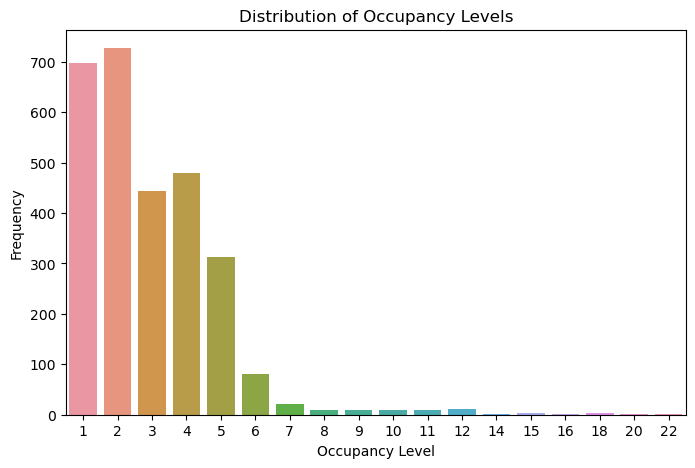

In [178]:
# Create visualizations, such as histograms or box plots, to visualize the distribution of 
# occupancy levels and identify any outliers

plt.figure(figsize=(8,5))
sns.countplot(x = occupancy_levels['Occupancy Level'])
plt.xlabel('Occupancy Level')
plt.ylabel('Frequency')
plt.title('Distribution of Occupancy Levels')

# Save Image
plt.savefig('occpancy_level_1')

# Display graph
plt.show()

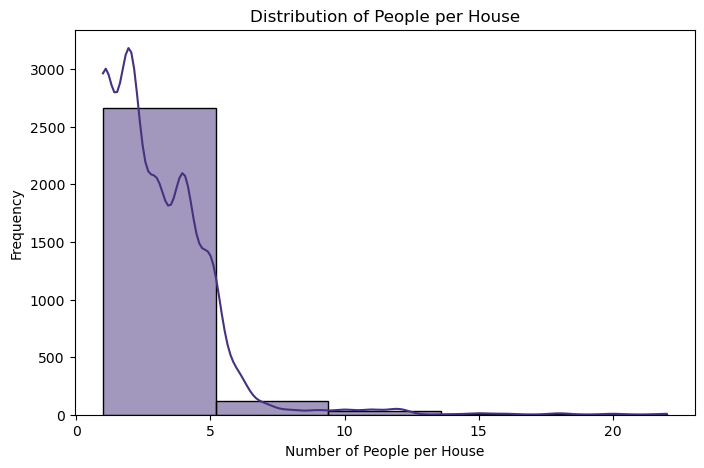

In [180]:
# Distribution of people per house
plt.figure(figsize=(8,5))
sns.histplot(occupancy_levels['Occupancy Level'], bins=5, kde=True, edgecolor='black')
plt.title('Distribution of People per House')
plt.xlabel('Number of People per House')
plt.ylabel('Frequency')

# Save Image
plt.savefig('occpancy_level_2')

# Display graph
plt.show()

In [182]:
# Statistical Analysis
occupancy_levels.describe()

,House Number,Occupancy Level
count,2824.000000,2824.000000
mean,29.295326,2.948654
std,34.552643,2.045493
min,1.000000,1.000000
25%,9.000000,2.000000
50%,19.000000,2.000000
75%,35.000000,4.000000
max,207.000000,22.000000


On an average the number of people living in a house is 3

In [204]:
# Set occupancy threshold
occupancy_threshold = 3

In [202]:
# Identify houses with occupancy levels below or above a certain 
# threshold to determine if they are moderatelyused or overused

moderatelyused = occupancy_levels[occupancy_levels['Occupancy Level'] <= occupancy_threshold]
moderatelyused.shape[0]

1868

In [203]:
# Overused House
overused_houses = occupancy_levels[occupancy_levels['Occupancy Level'] > occupancy_threshold]
overused_houses.shape[0]

956

In [191]:
# added occupation level
census['Occupancy Level'] = census.groupby(['House Number','Street'])['First Name'].transform('count')

array([ 2,  1,  4,  5,  3, 11,  6, 22,  7, 15, 12,  8, 10,  9, 18, 16, 20,
       14], dtype=int64)

In [207]:
# Creat a datafram from census
occupancy_df = census.copy()

In [208]:
# Get occupancy level
occupancy_df['Occupancy Level'] =  occupancy_df.groupby(['House Number','Street'])['First Name'].transform('count')

In [217]:
# Get the occupation dataframe
occupancy_df = occupancy_df[(occupancy_df['Marital Status'] != 'Unknown') & (occupancy_df['Marital Status'] != 'Child' )    ] 


<Figure size 800x500 with 0 Axes>

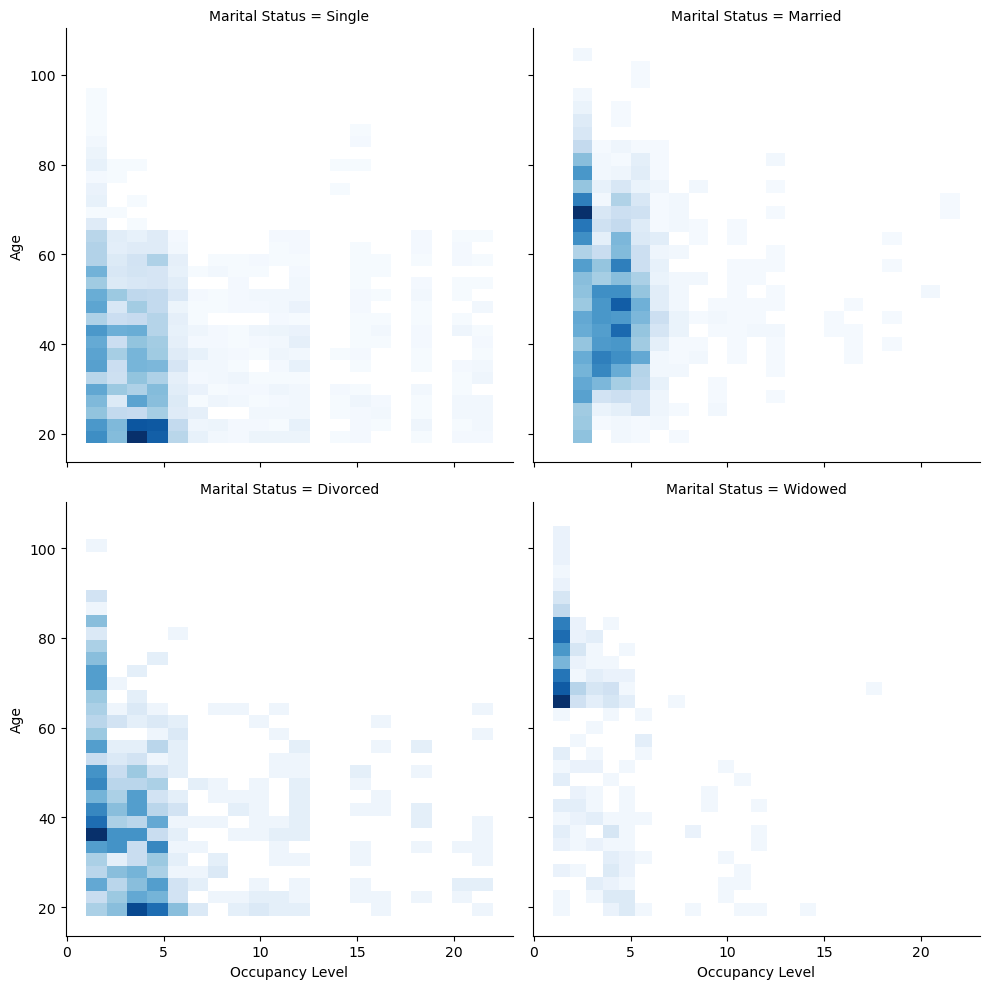

In [219]:

plt.figure(figsize=(8,5))
# Create a FacetGrid with 'Marital Status' as the column variable
occpancy_level_mr = sns.FacetGrid(occupancy_df, col="Marital Status", col_wrap=2, height=5)

# Map the histograms onto the grid
occpancy_level_mr.map(sns.histplot, 'Occupancy Level', 'Age', bins=(20, 30), cmap="Blues", )

# Save Image
plt.savefig('occpancy_level_mr')

# Display graph
plt.show()


In [221]:
# Occupancy levels by gender
correlation_gender = occupancy_df.groupby('Occupancy Level')['Gender'].value_counts().unstack()
correlation_gender

Gender,Female,Male
Occupancy Level,,
1,360,337
2,696,617
3,529,441
4,688,625
5,530,522
6,171,156
7,49,39
8,30,25
9,24,20


In [223]:
# Occupancy levels by marital status
occupancy_marital = occupancy_df.groupby('Occupancy Level')['Marital Status'].value_counts().unstack()
occupancy_marital

Marital Status,Divorced,Married,Single,Widowed
Occupancy Level,,,,
1,150.0,NaN,351.0,196.0
2,90.0,751.0,432.0,40.0
3,105.0,424.0,410.0,31.0
4,131.0,531.0,612.0,39.0
5,118.0,336.0,572.0,26.0
6,42.0,90.0,187.0,8.0
7,10.0,28.0,49.0,1.0
8,10.0,10.0,32.0,3.0
9,8.0,8.0,26.0,2.0


In [224]:
# Get the number of university students
university_students = census[census['Occupation'] == 'University Student'].shape[0]
print(f"Number of University Students: {university_students}")

Number of University Students: 558


In [230]:
# Get the number phd students
phd_students = census[census['Occupation'].str.contains('phd', case=False)].shape[0]
print(f"Number of PHD Students: {phd_students}")

Number of PHD Students: 14


In [236]:
# Get possible comutters
employed_number = census[census['Employment Status'] == 'Employed'].shape[0]
employed_number

4341

In [237]:
# Get the number of possible comutters
possible_comutters = university_students + phd_students + employed_number

print(f"Possible Number of Commuters: {possible_comutters}")

Possible Number of Commuters: 4913


In [240]:
# Get possible non comutters
possible_non_comutters = census.shape[0] - possible_comutters

print(f"Possible Number of non commuters: {possible_non_comutters}")

Possible Number of non commuters: 3414


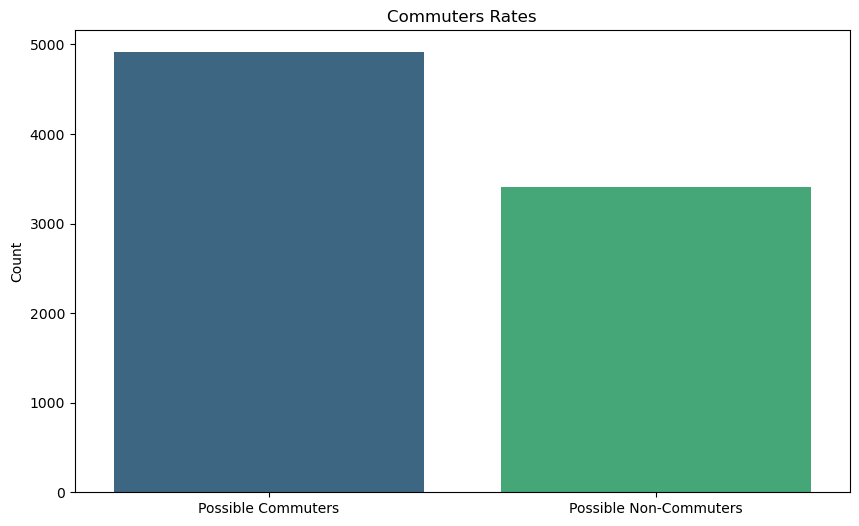

In [243]:
# Visualize the commuters rates

plt.figure(figsize=(10, 6))
sns.barplot(x=['Possible Commuters', 'Possible Non-Commuters'], y=[possible_comutters, possible_non_comutters], palette='viridis')
plt.title('Commuters Rates')

plt.savefig("commuters_rate.png")

plt.ylabel('Count')
plt.show()

In [244]:
# Calculate the number of individuals in specific age groups
child_population = census[(census['Age'] >= 0) & (census['Age'] <= 14)].shape[0]
adult_population = census[(census['Age'] >= 15) & (census['Age'] <= 64)].shape[0]
elderly_population = census[census['Age'] >= 65].shape[0]

In [246]:
# Estimate birth rate and death rate per 1,000 population
child_birth_rate = (child_population / census.shape[0]) * 1000
elderly_death_rate = (elderly_population / census.shape[0]) * 1000

# Display the results
print("Birth Rate (Children) per 1,000 Population:", child_birth_rate)
print("Death Rate (Elderly) per 1,000 Population:", elderly_death_rate)

Birth Rate (Children) per 1,000 Population: 204.6355229974781
Death Rate (Elderly) per 1,000 Population: 101.3570313438213


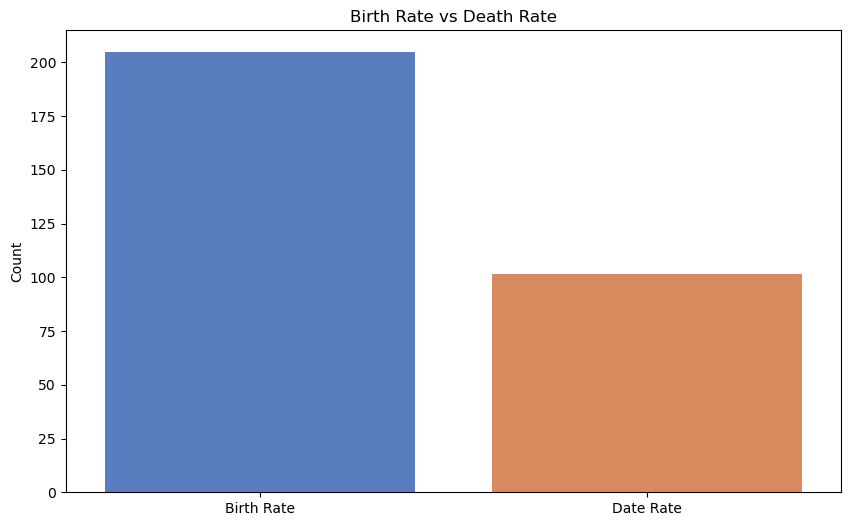

In [248]:
# Visualize the birth/death rates

plt.figure(figsize=(10, 6))
sns.barplot(x=['Birth Rate', 'Date Rate'], y=[child_birth_rate, elderly_death_rate], palette='muted')
plt.title('Birth Rate vs Death Rate')

plt.savefig("birth_rate.png")

plt.ylabel('Count')
plt.show()